In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-04-13 18:13:32.154722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


In [4]:
# Import dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Explore the Data
print(x_train.shape, len(y_train))

# Preprocess the Data
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28) 60000


In [6]:
# Build the CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/Users/archith25/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Train the CNN Model
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8155 - loss: 0.5270
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9020 - loss: 0.2725
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9191 - loss: 0.2186
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9304 - loss: 0.1866
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9426 - loss: 0.1535
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9522 - loss: 0.1302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9591 - loss: 0.1127
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9668 - loss: 0.0923
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9725 - loss: 0.0758
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9758 - loss: 0.0663


In [8]:
# Evaluate the CNN Model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1),  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9183 - loss: 0.3260

Test accuracy: 0.9182999730110168


In [9]:
# Make Predictions with the CNN Model
probability_model = tf.keras.models.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test.reshape(-1, 28, 28, 1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [10]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

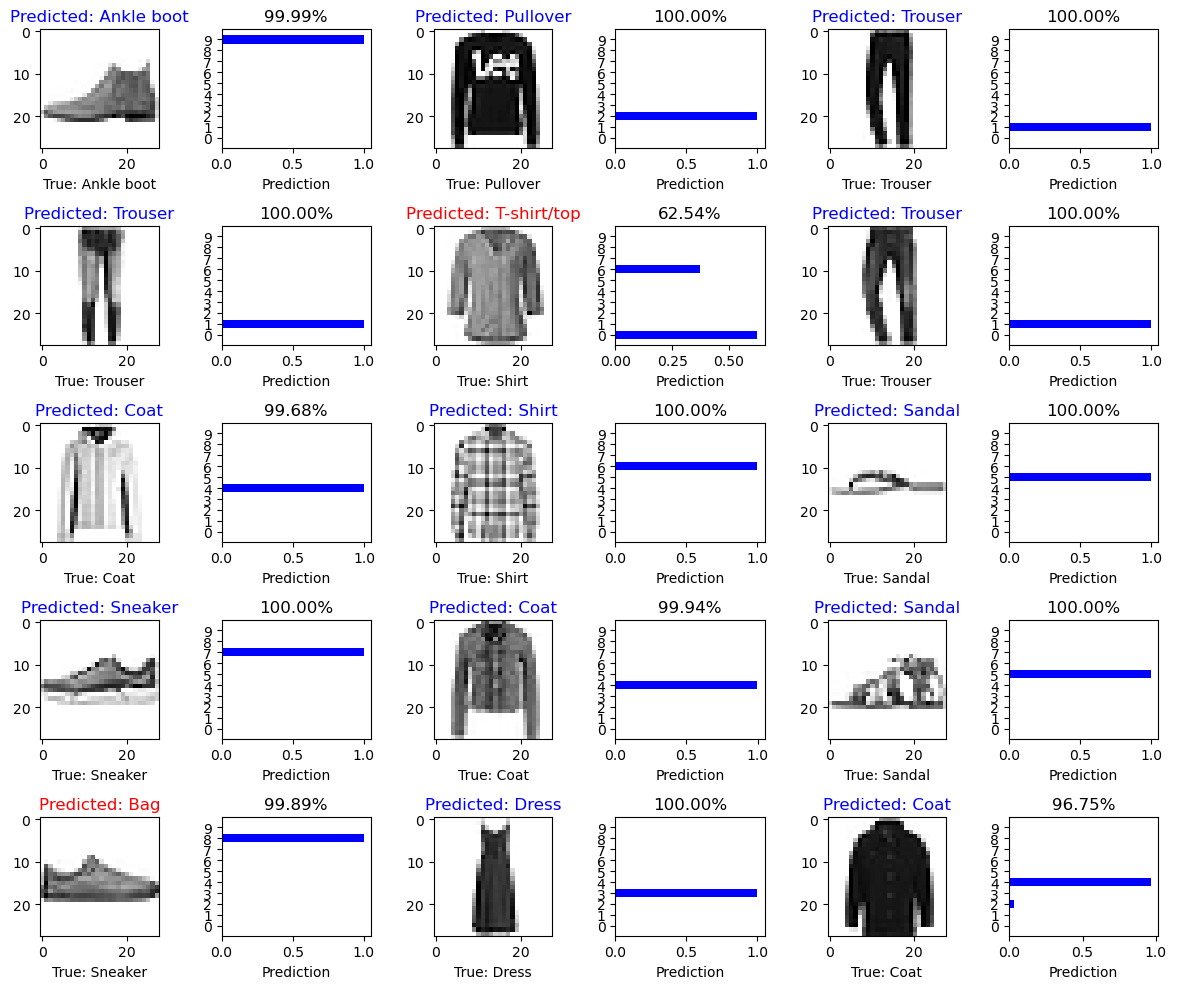

In [11]:
# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel("True: {}".format(class_names[y_test[i]]), color='black')
    plt.title("Predicted: {}".format(class_names[np.argmax(predictions[i])]), color='red' if np.argmax(predictions[i]) != y_test[i] else 'blue')

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.barh(range(10), predictions[i], color='b')
    plt.title("{0:.2f}%".format(100*np.max(predictions[i])))
    plt.yticks(range(10))
    plt.xlabel("Prediction")
plt.tight_layout()
plt.show()

In [12]:
model.save('my_model.keras')